# Laboratorio: Análisis de Regresión

### Antes de empezar:

* Lee el archivo README.md
* Comenta tanto como puedas y utiliza los recursos (archivo README.md)

¡Feliz aprendizaje!

## Desafío 1
Trabajo en un bootcamp de programación, y he desarrollado una teoría de que cuanto más jóvenes son mis estudiantes, más a menudo llegan tarde a clase. Para probar mi hipótesis, he recopilado algunos datos en la siguiente tabla:

| StudentID | Edad | Retrasos |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |


In [100]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Utiliza este comando para crear un dataframe con los datos proporcionados en la tabla.
~~~~
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [101]:
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})

Dibuja un diagrama de dispersión (scatter plot) para los datos.

In [102]:
# creating a scatter plot using the student_data
# specify x axis and y axis
fig = px.scatter(student_data, x = "Edad", y = "Retrasos")

# Display scatter plot
fig.show()


¿Ves alguna tendencia? ¿Puedes hacer alguna hipótesis sobre la relación entre la edad y el número de retrasos?

*La hipótesis es que hay una relación negativa dentro la edad y tiempo de retraso - en cuanto mas edad tenga, menos retraso tiene.*

Calcula la covarianza y la correlación de las variables en tu gráfico. ¿Cuál es la diferencia entre estas dos medidas? Compara sus valores. ¿Qué te indican en este caso? Agrega tus respuestas como comentarios después de tu código.

In [103]:
# calculate covariance
cov_mat = student_data.cov()
# calculate correlation
corr_mat = student_data.corr()

print(f"La covarianza dentro Edad y Retrasos es: {cov_mat.loc["Edad", "Retrasos"]}")
print(f"La correlación dentro Edad y Retrasos es: {corr_mat.loc["Edad", "Retrasos"]}")

# La covarianza negativa nos indica que existe una relacion negativa dentro los dos variables,
# y la correlacion siendo tan cerca que -1 nos comprueba que tiene una relacion lineal fuerte. 

La covarianza dentro Edad y Retrasos es: -45.56666666666666
La correlación dentro Edad y Retrasos es: -0.9391626886887123


Construye un modelo de regresión para estos datos. ¿Cuál será tu variable de resultado? ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [104]:
# Use simple linear regression for these two variables
# Create festure x (Edad) and ttarget Y(Retrasos)
X = student_data["Edad"].values.reshape(-1,1) #Feature matrix with shape (n_samples, n_features)
Y = student_data["Retrasos"].values

# Modelling
reg_model = LinearRegression().fit(X,Y)

# Calculate coefficient
print ('Intercept: ',reg_model.intercept_)    
print ('Coefficients: ', reg_model.coef_[0])

# El intercept de 12.88 indica que cuando el variable independiente (Edad) tiene valor 0, el modelo predice el retraso como 12.88
# Pero en el mundo real, la edad=0 no tiene sentido, asique solo tomamos que la prediccion de retrasos siempre sera mayor que 0
# El coeficiente de -0.24 indica que para cada aumento de 1 año en la edad, la prediccion de retraso reduce por 0.24.
# Un coeficiente negativo tambien indica la relacion negativa dentro los dos variables. Comprueba nuestro hipotesis

Intercept:  12.888803363135768
Coefficients:  -0.2428207709159808


Grafica tu modelo de regresión en tu diagrama de dispersión.

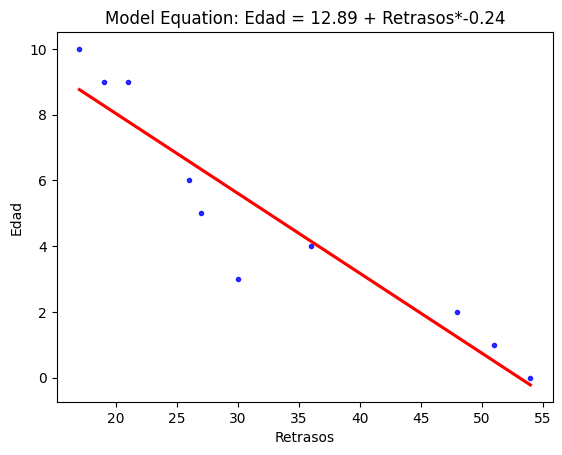

In [105]:
g = sns.regplot(x=X, y=Y, scatter_kws={'color': 'b', 's':9},
                 ci=False, color='r')  
g.set_title(f'Model Equation: Edad = {round(reg_model.intercept_, 2)} + Retrasos*{round(reg_model.coef_[0], 2)}')
g.set_ylabel('Edad')
g.set_xlabel('Retrasos')
plt.show()

Interpreta los resultados de tu modelo. ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? ¿Podemos decir que la edad es un buen predictor de la tardanza? Agrega tus respuestas como comentarios después de tu código.

In [106]:
# Additional evaluation of R^2 score and MSE
# Model evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score

# Evaluate the model on testing data
Y_pred = reg_model.predict(X)
test_mse = mean_squared_error(Y, Y_pred)
test_r2 = r2_score(Y, Y_pred)

print("Training data evaluation")
print("Mean squared error (MSE):", test_mse)
print("Coefficient of determination (R^2):", test_r2)

Training data evaluation
Mean squared error (MSE): 1.3319201847356268
Coefficient of determination (R^2): 0.8820265558250109


* El MSE = 1.33 indica que el modelo se representa bien la relacion de los variables, y el R^2 muy cerca que valor 1 indica es modelo es bastante preciso*

## Desafío 2
Para la segunda parte de este laboratorio, utilizaremos el conjunto de datos vehicles.csv. Puedes encontrar una copia del conjunto de datos en la carpeta de GitHub. Este conjunto de datos incluye variables relacionadas con las características de los vehículos, incluyendo el modelo, la marca y los estándares de eficiencia energética, así como las emisiones de CO2 de cada coche. Como se discutió en clase, el objetivo de este ejercicio es predecir las emisiones de CO2 de los vehículos basándose en varias variables independientes.

In [107]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("/Users/mmeegg/Ironhack/lab-regression-analysis-es/vehicles.csv")
vehicles.head(2)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550


Vamos a utilizar las siguientes variables para nuestro análisis: Año, Cilindros, Barriles de Combustible/Año, MPG Combinado, y Costo de Combustible/Año. Utilizaremos 'Emisiones de CO2 Gramos/Milla' como nuestra variable de resultado.

Calcula las correlaciones entre cada una de estas variables y el resultado. ¿Cuál variable crees que será la más importante para determinar las emisiones de CO2? ¿Cuál proporciona la menor cantidad de información útil para determinar las emisiones de CO2? Agrega tus respuestas como comentarios después de tu código.

In [108]:
# select numerical columns in dataset
num_df = vehicles.select_dtypes(include=["number"])

corr_matrix = num_df.corr()
corr_matrix.loc[:, "CO2 Emission Grams/Mile"]

Year                      -0.222300
Engine Displacement        0.803520
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
City MPG                  -0.894139
Highway MPG               -0.926405
Combined MPG              -0.926229
CO2 Emission Grams/Mile    1.000000
Fuel Cost/Year             0.930865
Name: CO2 Emission Grams/Mile, dtype: float64

Construye un modelo de regresión para estos datos. ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [109]:
# Use linear regression for variables wityh strong correlation
# In this case, x= "Fuel Barrels/Year", "Fuel Cost/Year", "Engine Displacement", "Cylinders", "City MPG", "Highway MPG", "Combined MPG".

from sklearn.model_selection import train_test_split # import library for testing group

X = vehicles[["Fuel Barrels/Year", "Fuel Cost/Year", "Engine Displacement", "Cylinders", "City MPG", "Highway MPG", "Combined MPG"]]
Y = vehicles["CO2 Emission Grams/Mile"]

# sepera dataset into training y testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create the model and fit it to the training data
model = LinearRegression()
model.fit(X_train, Y_train)

# Make prediction on the test data
Y_preddiction = model.predict(X_test)

# Elaluate the model
MSE = mean_squared_error(Y_test, Y_preddiction)
R_2 = r2_score(Y_test, Y_preddiction)

print("Mean Squared Error:", MSE)
print("R^2 Score:", R_2)

Mean Squared Error: 267.7493664140723
R^2 Score: 0.9810193875047807


In [110]:
# Polynomial Regression to test if there are non-lineal relationship

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_poly, Y, test_size=0.2, random_state=42)

# Create the model and fit it to the training data
model = LinearRegression()
model.fit(X_train, Y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 17.915698597248632
R^2 Score: 0.9987299655001625


Imprime el resumen de tu regresión e interpreta los resultados. ¿Cuáles son las variables más importantes en tu modelo y por qué? ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? Agrega tus respuestas como comentarios después de tu código.

In [111]:
# Comparando el resultado de MSE de los dos modelos, El polynominal regression siendo 17.92, es mucho mas pequeño
# indica que el modelo polynomianl regression es mas preciso

# El R^2 cuando sea mas cerca que 1, indica mejor encaja el modelo con el dataset
# Significa que el modelo polynomianl regression es mas preciso

## Desafío Extra: Análisis de Errores

Estoy sospechando de las últimas fiestas que he organizado: parece que cuanto más gente invito, más personas no pueden asistir. Para saber si mi presentimiento está respaldado por los datos, he decidido hacer un análisis. He recopilado mis datos en la tabla a continuación, donde X es el número de personas que invité, y Y es el número de personas que asistieron.

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

Queremos saber si la relación modelada por las dos variables aleatorias es lineal o no, y por lo tanto, si es apropiado modelarla con una regresión lineal.
Primero, construye un dataframe con los datos.

In [112]:
df_fiesta = pd.DataFrame({"Invited":[1,3,4,6,8,9,11,14], "Participated":[1,2,4,4,5,7,8,13]})
df_fiesta["Absence"] = df_fiesta["Invited"]-df_fiesta["Participated"]
df_fiesta


,Invited,Participated,Absence
0,1,1,0
1,3,2,1
2,4,4,0
3,6,4,2
4,8,5,3
5,9,7,2
6,11,8,3
7,14,13,1


Dibuja un diagrama de dispersión (scatter plot) para los datos y ajusta una línea de regresión.

In [113]:
fig = px.scatter(df_fiesta, x="Invited", y="Absence")

fig.show()

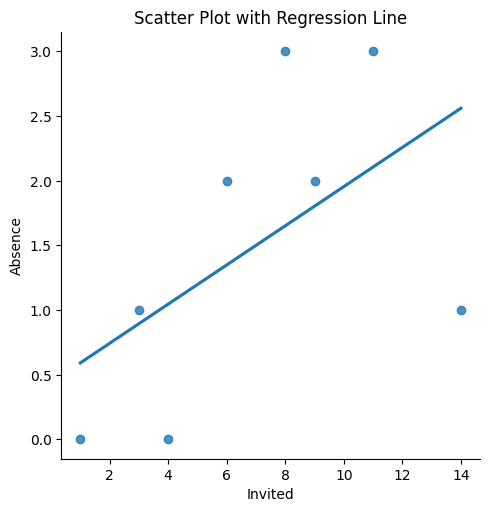

In [114]:
sns.lmplot(df_fiesta, x="Invited", y="Absence", ci=None)
plt.xlabel("Invited")
plt.ylabel("Absence")
plt.title("Scatter Plot with Regression Line")
plt.show()

In [115]:
X = df_fiesta["Invited"].values.reshape(-1,1)
Y = df_fiesta["Absence"].values

model1 = LinearRegression()
model1.fit(X,Y)

intercept = model1.intercept_
slope = model1.coef_[0]

print(f"Intercept: {intercept}")    
print(f"Coefficients: {slope}")

Intercept: 0.4393939393939392
Coefficients: 0.15151515151515155


¿Qué ves? ¿Qué te indica este gráfico sobre la probable relación entre las variables? Imprime los resultados de tu regresión.

* Segun el coeficient = 0.15, indica que no hay una relacion muy fuerte dentro los doa variables *

¿Ves algún punto problemático o valores atípicos en tus datos? Elimina estos puntos y recalcula tu regresión. Imprime el nuevo diagrama de dispersión con tu nuevo modelo y los resultados de tu modelo.

Slope= 0.4393939393939392, coefficients= 0.15151515151515155


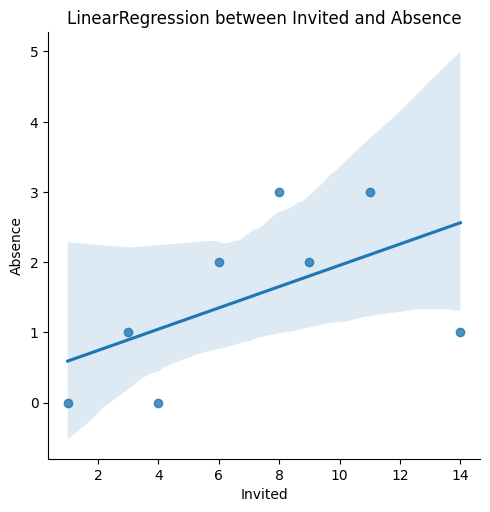

In [122]:
from scipy.stats import zscore

# Calculate zscore of the absence column
df_fiesta["Absence_zscore"] = zscore(df_fiesta["Absence"])

# Define a threshold to identify outliers
threshold = 2
outliers = df_fiesta[np.abs(df_fiesta["Absence_zscore"])>threshold]

# Remove outliers
df_fiesta_new = df_fiesta[np.abs(df_fiesta['Absence_zscore']) <= threshold]

# Drop outliers columns
df_fiesta_new = df_fiesta_new.drop(columns="Absence_zscore")

# Describe the new model
X_clean = df_fiesta_new["Invited"].values.reshape(-1,1)
Y_clean = df_fiesta_new["Absence"].values

model2 = LinearRegression().fit(X_clean,Y_clean)

print(f"Slope= {model2.intercept_}, coefficients= {model2.coef_[0]}")

# create regression line
sns.lmplot(data=df_fiesta_new, x="Invited", y="Absence")
plt.xlabel("Invited")
plt.ylabel("Absence")
plt.title("LinearRegression between Invited and Absence")
plt.show()

¿Qué cambió? Basado en los resultados de los dos modelos y tus gráficos, ¿qué puedes decir sobre la forma de los datos con el punto problemático y sin él?

No ha cambiado la linea de regression tras eliminar los outliers, la relacion dentro los dos variables no es significante. 